# 1. COMUNICACION DE RESULTADOS

## 1.1 Importación

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

pd.options.display.max_columns = None

con = sa.create_engine('sqlite:///../Datos_Madrid_2024/airbnb.db')

df = pd.read_sql('df_preparado', con = con)

#Minicubo:

metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])

minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24910 entries, 0 to 24909
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         24910 non-null  int64  
 1   index                           24910 non-null  int64  
 2   id                              24910 non-null  int64  
 3   name                            24910 non-null  object 
 4   host_id                         24910 non-null  int64  
 5   neighbourhood_group             24910 non-null  object 
 6   neighbourhood                   24910 non-null  object 
 7   latitude                        24910 non-null  float64
 8   longitude                       24910 non-null  float64
 9   room_type                       24910 non-null  object 
 10  price                           24910 non-null  int64  
 11  minimum_nights                  24910 non-null  int64  
 12  calculated_host_listings_count  

## 1.2. CONTEXTO DEL ANÁLISIS

La empresa ha seleccionado la ciudad de **Madrid** como candidata para **buscar inmuebles en los que invertir con el objetivo de obtener rentabilidad mediante alquiler turístico.**

Para ello, antes de poner al equipo de valoraciones a buscar oportunidades, la dirección ha encargado al equipo de Data Science un **análisis de Discovery que permita identificar estrategias o líneas de trabajo que ayuden a dirigir la actuación del equipo de valoraciones.**

## 1.3. OBJETIVOS

* Analizar las fuentes de datos públicas disponibles
* Para encontrar insights que ayuden a entender las características del mercado en esta ciudad
* Y guíen el trabajo de búsqueda del equipo de valoraciones
* Especialmente en cuanto a los principales ejes: precio del alquiler, niveles de ocupación y precio de compra

## 1.4. CONCLUSIONES EJECUTIVAS

* Se han localizado **8 barrios** de interés, de los cuales 4 están en el distrito de **Ciudad Lineal**
* Los inmuebles de **2 habitaciones** presentan la mejor relación compra-alquiler
* Los inmuebles con **2 camas** presentan la mejor relación compra-alquiler
* Se recomienda buscar inmuebles que permitan alojar hasta **3 huéspedes**
* Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
* Se han localizado los mejores inmuebles para invertir en Ciudad Lineal

## 1.5. DETALLE DE LOS PRINCIPALES RESULTADOS

### 1.5.1 Existen 8 barrios con alto potencial de inversión

Una vez localizados los **8 barrios** que pueden maximizar la relación compra-alquiler, podemos segmentar en **3 grandes grupos:**

* Inversión baja: **Colina, Costillares y San Juan Bautista**
    *  El barrio **Atalaya** en Ciudad Lineal presenta un único registro. Esto podría indicar una oportunidad en un mercado poco desarrollado. Sin embargo, se requiere mayor información para confirmar este hallazgo.
* Inversión media: **Jerónimos, El viso**
* Inversión media-alta: **Almagro y Trafalgar**

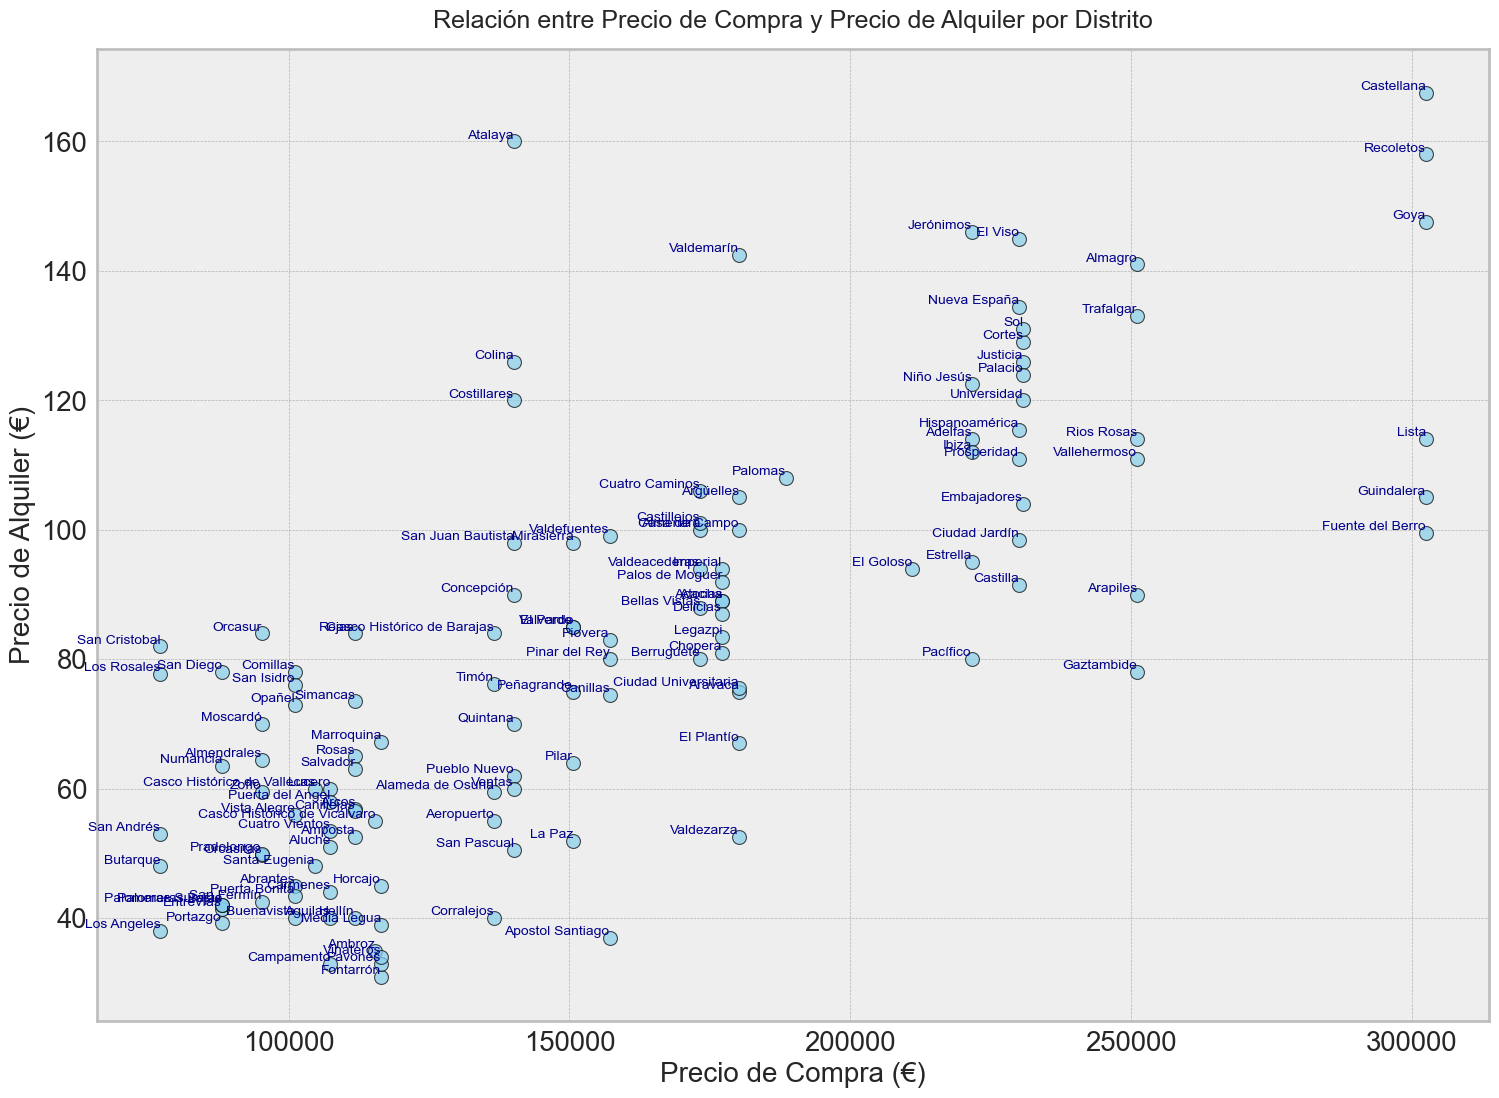

In [41]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp = temp[temp.index != 'Fuentelareina']

#Estilo sns
sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1.2)
plt.style.use('bmh')
# Gráfico scatterplot con puntos y posible etiquetado del distrito atípico
plt.figure(figsize=(16, 12))
sns.scatterplot(data=temp, x='precio_compra', y='precio_total', s=100, color='skyblue', alpha=0.7, edgecolor='black')

# Añadir etiqueta al distrito atípico
for i in range(temp.shape[0]):
    if temp.index[i] == 'Fuentelareina':  # Identificando distrito atípico
        plt.text(
            temp.precio_compra.iloc[i],  
            temp.precio_total.iloc[i],  
            temp.index[i],              
            fontsize=10,                
            ha='right',                 
            va='bottom',                
            color='red'                 # Resaltando el distrito atípico
        )
    else:
        plt.text(
            temp.precio_compra.iloc[i],  
            temp.precio_total.iloc[i],  
            temp.index[i],              
            fontsize=10,                
            ha='right',                 
            va='bottom',                
            color='darkblue'
        )

# Mejoras en los ejes y título
plt.title("Relación entre Precio de Compra y Precio de Alquiler por Distrito", fontsize=18, pad=15)
plt.xlabel("Precio de Compra (€)", fontsize=20)
plt.ylabel("Precio de Alquiler (€)", fontsize=20)
plt.grid(alpha=1)

plt.show()


### 1.5.2. Buscar inmuebles con 2 habitaciones

* Los inmuebles con **2 habitaciones** presentan la mejor relación la mejor relación compra-alquiler

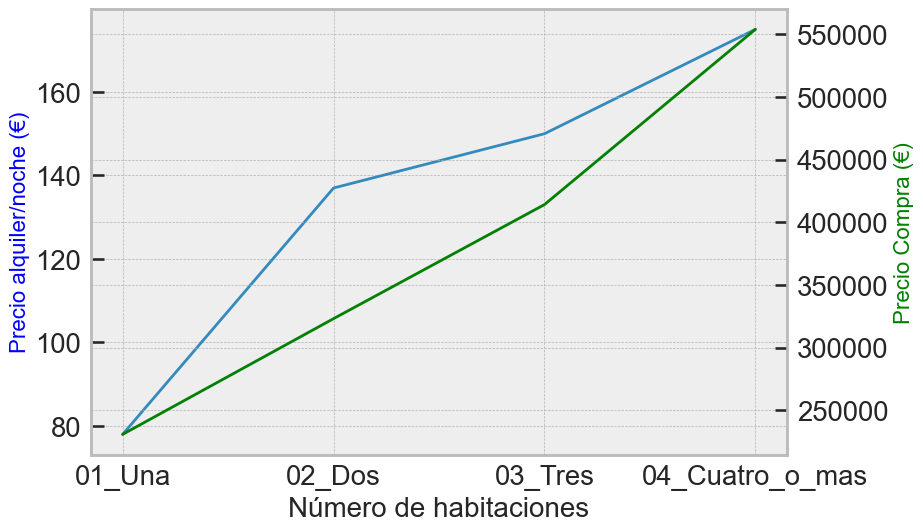

In [43]:
import matplotlib.pyplot as plt

# Crear gráfico
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].iloc[1:].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].iloc[1:].precio_compra, color='green')

# Etiquetas para los ejes
ax.set_xlabel('Número de habitaciones', fontsize = 20)
ax.set_ylabel('Precio alquiler/noche (€)', color='blue', fontsize = 16)
ax2.set_ylabel('Precio Compra (€)', color='green', fontsize = 16)

# Mostrar gráfico
plt.show()

### 1.5.3. Buscar inmuebles con 2 camas

* Los inmuebles con **2 camas** presentan la mejor relación la mejor relación compra-alquiler

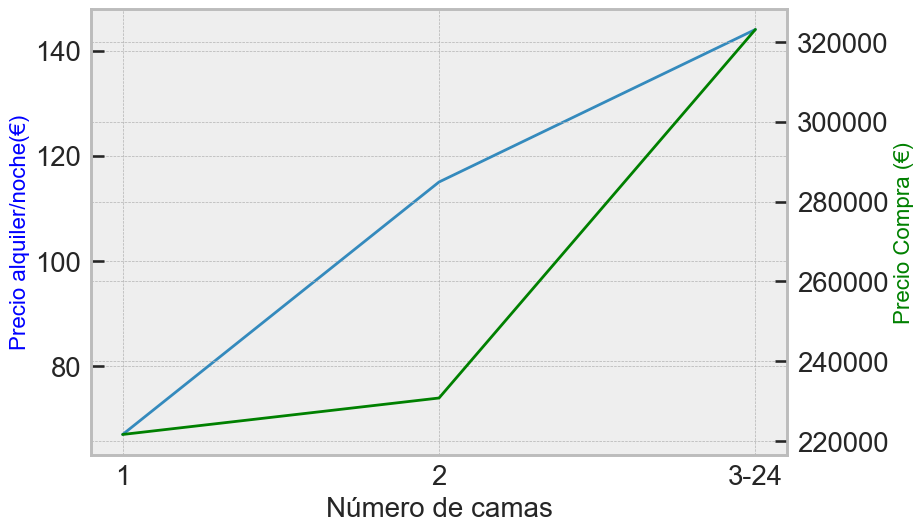

In [48]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green')

# Etiquetas para los ejes
ax.set_xlabel('Número de camas', fontsize = 20)
ax.set_ylabel('Precio alquiler/noche(€)', color='blue', fontsize = 16)
ax2.set_ylabel('Precio Compra (€)', color='green', fontsize = 16);

### 1.5.4. Buscar inmuebles de una habitación que permitan 3 huéspedes

* El **número de huéspedes** que maximiza el precio de compra pagado es de 3

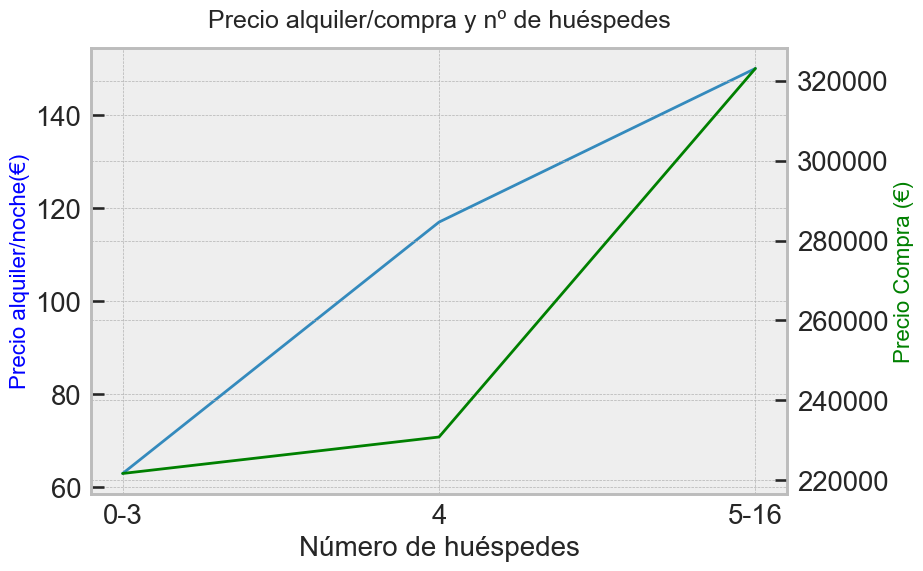

In [47]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green')

# Etiquetas para los ejes
plt.title("Precio alquiler/compra y nº de huéspedes", fontsize=18, pad=15)
ax.set_xlabel('Número de huéspedes', fontsize = 20)
ax.set_ylabel('Precio alquiler/noche(€)', color='blue', fontsize = 16)
ax2.set_ylabel('Precio Compra (€)', color='green', fontsize = 16);

### 1.5.5. Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés

* Previsiblemente tendrán menor precio de compra

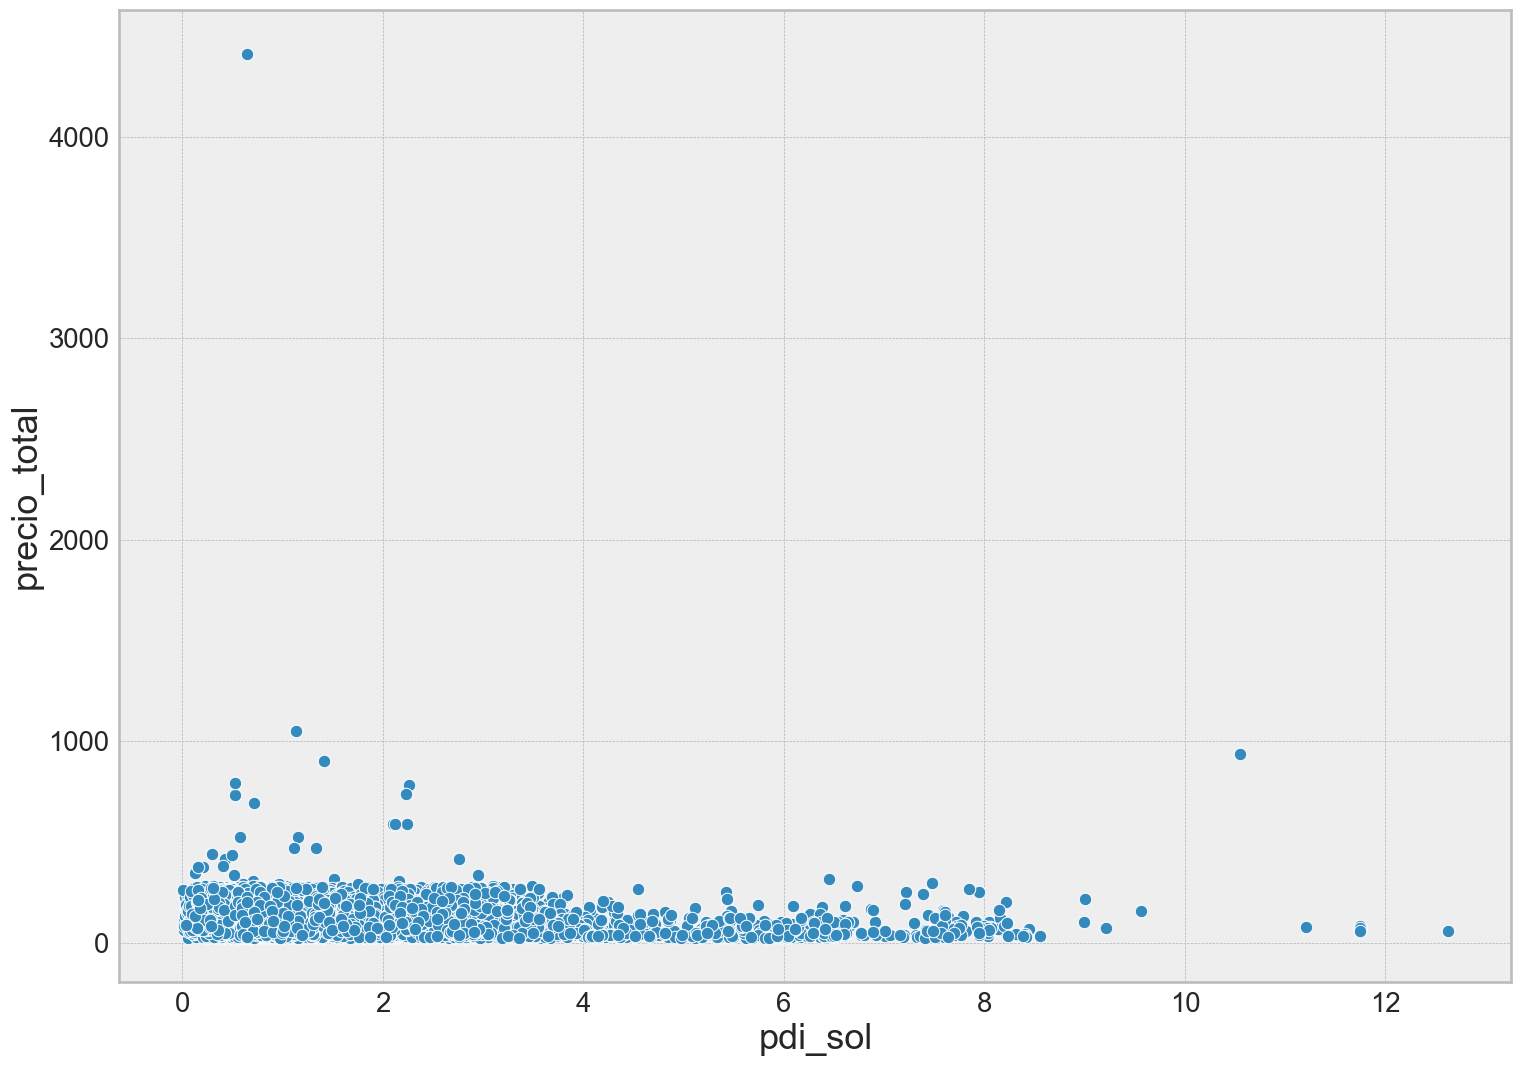

In [49]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

### 1.5.6. Los mejores inmuebles para invertir en Ciudad Lineal

* En el mapa aperecen los mejores inmuebles en Ciudad Lineal.

* Los puntos verdes son la combinación de un precio de compra bajo (menos de 140.000€) y un precio de alquiler alto (más de 99€).

In [75]:
datos = df[df.distrito == 'Ciudad Lineal'].copy()
datos = datos[datos['precio_compra'] >= 0]
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['green', 'yellow', 'orange', 'red'])
datos['precio_compra_disc'] = pd.cut(datos['precio_compra'], 
                       bins=[0, 140070, 196098, 252126, 420210],
                       labels=['green', 'yellow', 'orange', 'red'],
                       include_lowest=True)

datos['invertir'] = np.where(
    (datos['precio_total_disc'] == 'red') & (datos['precio_compra_disc'] == 'green'),
    True,
    False
)
import folium
# Filtra los datos donde 'invertir' es True
datos_invertir = datos[datos['invertir'] == True]

# Crea un mapa centrado en tu ubicación de interés
mapa = folium.Map(location=[40.4167278, -3.7033387], zoom_start=12)

# Agrega los puntos al mapa
for _, fila in datos_invertir.iterrows():
    folium.CircleMarker(
        location=[fila['latitude'], fila['longitude']],
        radius=5,  # Ajusta el tamaño si es necesario
        fill=True,
        color='green',  # Puedes cambiar el color o basarte en alguna variable
        fill_opacity=0.8,
        popup=f"Precio alquiler: {fila['precio_total']}€"  # Ajusta el contenido del popup
    ).add_to(mapa)

# Mostrar el mapa
mapa